In [1]:
%matplotlib inline


# Multi-dimensional scaling

## Manel Soler Sanz

Utilizaremos el dataset de caras de Olivetti de AT&T para aprender embeddings en un espacio de 2 dimensiones. El dataset tiene 10 imágenes de 64x64 por persona, cada imagen adquirida con diferentes expresiones faciales o condiciones de iluminación. 

Al aplicar MDS pretendemos que se preserven los patrones de los datos de manera que imágenes de caras de la misma persona estén cerca, pero lejos de las caras del resto de personas. 

Para que se puede ver correctamente, se cogerán caras de únicamente 4 personas.

Para ver los diferentes parámetros de entrada del algoritmo MDS:

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

In [24]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pandas as pd

Antes de aplicar MDS, escribiremos un pequeña función, mapeaDatos(), que tome los argumentos de entrada, i.e., la matriz de distancias entre puntos matriz_dist, matriz X de "raw data", la variable de clase y, una variable booleana que permita seleccionar si se aplica MDS métrica (TRUE) o no métrica (FALSE) y el título del gráfico.

La función aplica MDS a la matriz de distancias y representa los puntos transformados en 2D, con el mismo color para los puntos de la misma persona. En la segunda figura representa la imagen de cada cara sobre el gráfico en el espacio de baja dimensionalidad.

In [3]:
def mapeaDatos(matriz_dist, X, y, metrica, titulo):
    mds = MDS(metric=metrica, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(matriz_dist)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(titulo)    
    plt.show()

Elegimos las caras de 4 personas:

In [4]:
caras = dt.fetch_olivetti_faces()
X_caras = caras.data
y_caras = caras.target
ind = y_caras < 4
X_caras = X_caras[ind,:]
y_caras = y_caras[ind]

Nuestra matriz F será en este caso la distancia euclídea.

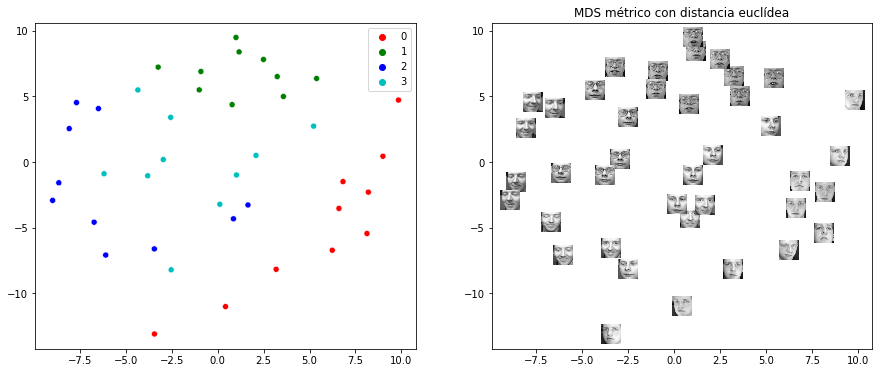

In [5]:
distancia_euclidea = euclidean_distances(X_caras)
mapeaDatos(distancia_euclidea, X_caras, y_caras, True, 'MDS métrico con distancia euclídea')

## Hands-On

#### Ejercicio 1 Manhattan distances

Ejecuta el código utilizando otro tipo de distancia, como por ejemplo `manhattan_distances`. ¿Observas diferencias en el resultado?

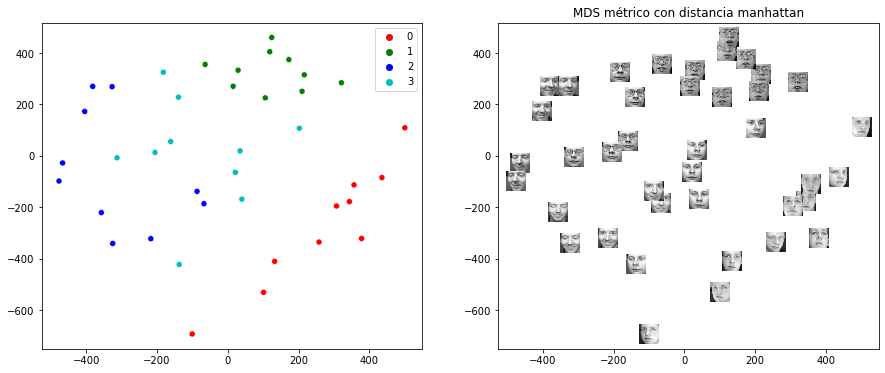

In [6]:
distancia_manhattan = manhattan_distances(X_caras)
mapeaDatos(distancia_manhattan, X_caras, y_caras, True, 'MDS métrico con distancia manhattan')

## Observaciones
No hemos observado ningun caambio en el resultado

#### Ejercicio 2 Non-metric MDS

Ejecuta el código utilizando "Non-metric MDS". ¿Observas diferencias en el resultado?

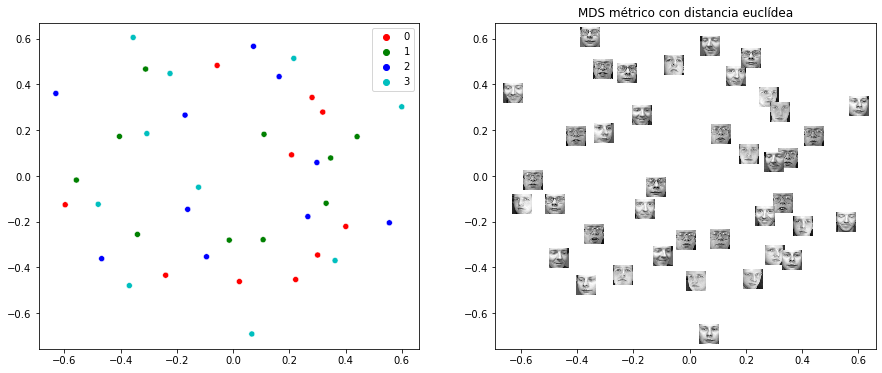

In [7]:
mapeaDatos(distancia_euclidea, X_caras, y_caras, False, 'MDS métrico con distancia euclídea')

## Observaciones

observamos que la distribucion de las caras ahora no permite trazar una frontera de clasficación lineal entre caras. Antes, en cambio, podiamos diferenciar varios clusters con una frontera lineal

#### Ejercicio 3 Número de componentes

Uno de los hiper-parámetros más importantes relacionados con MDS es el tamaño del espacio de bajas dimensiones. Este factor es relevante si aplicamos MDS como preprocesado para reducir la dimensionalidad. ¿Cuantas dimensiones cogemos sin perder demasiada información?

Para ello, ejecuta MDS con diferente número de componentes (i.e. de 1 a 20) y representa el valor del `stress` en cada caso (consulta la documentación de mds si es necesario).

El `stress` te da información sobre la bondad del ajuste en MDS.

In [18]:
stress=[] #sum of squared distance of the disparities and the distances for all constrained points).
for nc in range (1,21): 
    mds = MDS(metric=True, dissimilarity='precomputed', random_state=0, n_components= nc)
    # Get the embeddings
    mds.fit_transform(distancia_euclidea)
    
    stress.append(mds.stress_)
    
 
    

Text(0.5, 1.0, 'Valor de stress para cada numero de componentes')

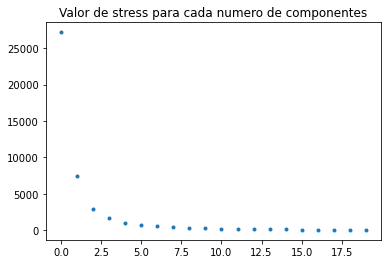

In [23]:
plt.plot(stress, ".")
plt.title("Valor de stress para cada numero de componentes")


Verás que al aumentar el número de componentes el stress disminuye. El valor óptimo para elegir el número de componentes sería el "codo" de la curva. ¿Qué valor escogerías para tener un stress de alrededor de 2500?

Vemos que el codo de la curva, correspondiente a un valor de ~2500, es para 3 componentes

#### Ejercicio 4 Aplica el algoritmo MDS al dataset `eurodist`

`eurodist`proporciona las distancias por carretera (en km) entre 21 ciudades europeas. Aplica el algoritmo MDS métrico a este dataset y representa el resultado en 2D de manera que las ciudades se encuentren localizadas como en un mapa. 

Puedes descargarte `eurodist.csv` desde el enlace siguiente:
https://github.com/neurospin/pystatsml/tree/master/datasets

In [122]:
df = pd.read_csv('eurodist.csv')  

euro = df.iloc[0:22,1:22]
names = df.iloc[0:22,0]


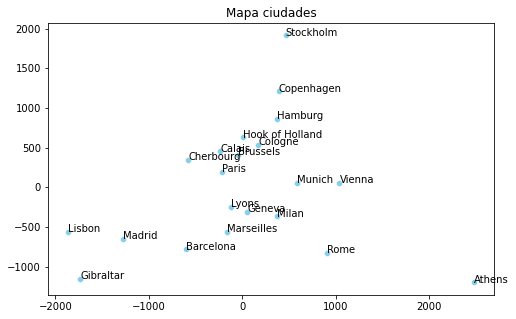

In [124]:
euro = dist
mds = MDS(dissimilarity='precomputed', random_state=0)
pts = mds.fit_transform(euro)
# Plot the embedding, colored according to the class of the points
theta = 90*np.pi/180
rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

#pts = np.flip(pts, 1)
pts[:,1] = -pts[:,1]
#pts[:,0] = -pts[:,0]
pts = np.dot(pts, rot)

plt.figure(figsize=(8,5))
sns.scatterplot(x=pts[:, 0], y=pts[:, 1], color="skyblue")

for i in range(len(pts)):
    plt.text(x=pts[i, 0],y=pts[i, 1],s=names[i])

plt.title("Mapa ciudades")
plt.show()